In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import re 
import seaborn as sns 

In [2]:
train = pd.read_csv('../KaggleX Cohort4/kagglex-cohort4/train.csv')
test = pd.read_csv('../KaggleX Cohort4/kagglex-cohort4/test.csv')

In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36183 entries, 0 to 36182
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            36183 non-null  int64 
 1   brand         36183 non-null  object
 2   model         36183 non-null  object
 3   model_year    36183 non-null  int64 
 4   milage        36183 non-null  int64 
 5   fuel_type     36183 non-null  object
 6   engine        36183 non-null  object
 7   transmission  36183 non-null  object
 8   ext_col       36183 non-null  object
 9   int_col       36183 non-null  object
 10  accident      36183 non-null  object
 11  clean_title   36183 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.3+ MB


In [4]:
train.shape

(54273, 13)

In [5]:
train.head()

id    brand          model  model_year  milage fuel_type  \
0   0     Ford   F-150 Lariat        2018   74349  Gasoline   
1   1      BMW          335 i        2007   80000  Gasoline   
2   2   Jaguar      XF Luxury        2009   91491  Gasoline   
3   3      BMW   X7 xDrive40i        2022    2437    Hybrid   
4   4  Pontiac  Firebird Base        2001  111000  Gasoline   

                                              engine  \
0      375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
1  300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
2       300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel   
3  335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
4      200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col       accident clean_title  \
0                    10-Speed A/T    Blue    Gray  None reported         Yes   
1                     6-Speed M/T   Black   Black  None reported         Yes   
2                     6-Speed A/T  Purple   Beige  None reported         Yes   
3  Transmission w/Dual Shift Mode    Gray   Brown  None reported         Yes   
4                             A/T   White   Black  None reported         Yes   

   price  
0  11000  
1   8250  
2  15000  
3  63500  
4   7850

In [6]:
for feature in train:
    print(feature, ": ",train[feature].nunique(),"\n",train[feature].unique(),"\n")

id :  54273 
 [    0     1     2 ... 54270 54271 54272] 

brand :  53 
 ['Ford' 'BMW' 'Jaguar' 'Pontiac' 'Acura' 'Audi' 'GMC' 'Maserati'
 'Chevrolet' 'Porsche' 'Mercedes-Benz' 'Tesla' 'Lexus' 'Kia' 'Lincoln'
 'Dodge' 'Volkswagen' 'Land' 'Cadillac' 'Mazda' 'RAM' 'Subaru' 'Hyundai'
 'MINI' 'Jeep' 'Honda' 'Hummer' 'Nissan' 'Toyota' 'Volvo' 'Genesis'
 'Mitsubishi' 'Buick' 'INFINITI' 'McLaren' 'Scion' 'Lamborghini' 'Bentley'
 'Suzuki' 'Ferrari' 'Alfa' 'Rolls-Royce' 'Chrysler' 'Aston' 'Rivian'
 'Lotus' 'Saturn' 'Lucid' 'Mercury' 'Maybach' 'FIAT' 'Plymouth' 'Bugatti'] 

model :  1827 
 ['F-150 Lariat' '335 i' 'XF Luxury' ... 'Q4 e-tron Sportback Premium'
 'Countryman Cooper' 'S-10 LS'] 

model_year :  34 
 [2018 2007 2009 2022 2001 2003 2014 2019 2016 2017 2013 2021 2015 2020
 2012 2006 2023 2011 2010 1999 2004 1993 2002 2005 2008 1995 1998 2000
 1997 1994 1996 2024 1992 1974] 

milage :  3212 
 [74349 80000 91491 ... 62850 82984 28750] 

fuel_type :  7 
 ['Gasoline' 'Hybrid' 'E85 Flex Fuel' 

In [7]:
cat_feat = ['brand' , 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident']
num_feat = ['model_year', 'milage']

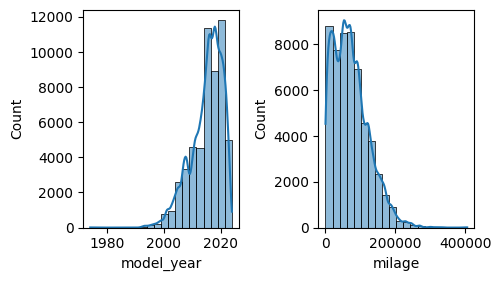

In [8]:
plt.figure(figsize=(12, 8))
for feature in num_feat:
    plt.subplot(3, 5, num_feat.index(feature) + 1)
    sns.histplot(data=train[feature], bins=20, kde=True)
plt.tight_layout()
plt.show()

In [9]:
from datetime import datetime

In [10]:
## Changing Model_year to Age 
age = []
testage = []
date = datetime.now().year + 1
for m_year in train['model_year']: 
    age.append(date-m_year)

for m_year in test['model_year']: 
    testage.append(date-m_year)

In [11]:
train['age'] = age 
train = train.drop('model_year' , axis=1)

In [12]:
test['age'] = testage
test = test.drop('model_year' , axis=1)

In [13]:
train.head()

id    brand          model  milage fuel_type  \
0   0     Ford   F-150 Lariat   74349  Gasoline   
1   1      BMW          335 i   80000  Gasoline   
2   2   Jaguar      XF Luxury   91491  Gasoline   
3   3      BMW   X7 xDrive40i    2437    Hybrid   
4   4  Pontiac  Firebird Base  111000  Gasoline   

                                              engine  \
0      375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
1  300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
2       300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel   
3  335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
4      200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col       accident clean_title  \
0                    10-Speed A/T    Blue    Gray  None reported         Yes   
1                     6-Speed M/T   Black   Black  None reported         Yes   
2                     6-Speed A/T  Purple   Beige  None reported         Yes   
3  Transmission w/Dual Shift Mode    Gray   Brown  None reported         Yes   
4                             A/T   White   Black  None reported         Yes   

   price  age  
0  11000    7  
1   8250   18  
2  15000   16  
3  63500    3  
4   7850   24

In [14]:
skewness = train[['milage', 'age']].skew()
skewness

milage    0.856366
age       0.940515
dtype: float64

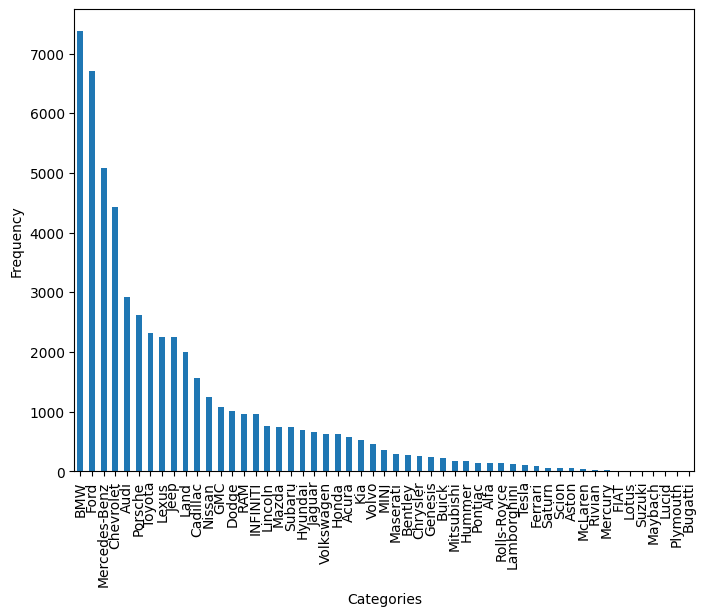

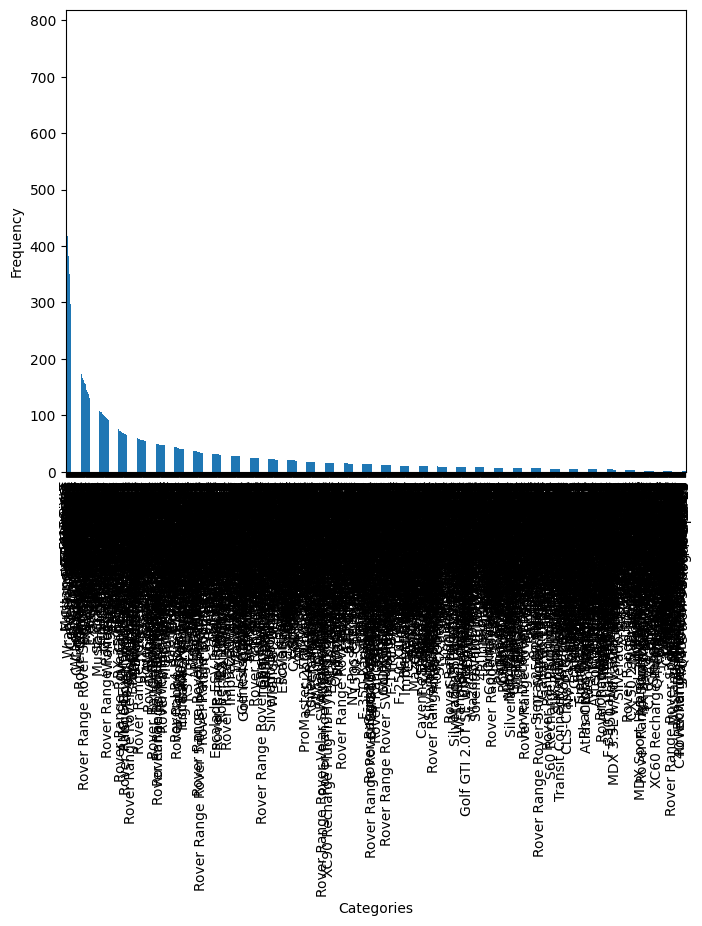

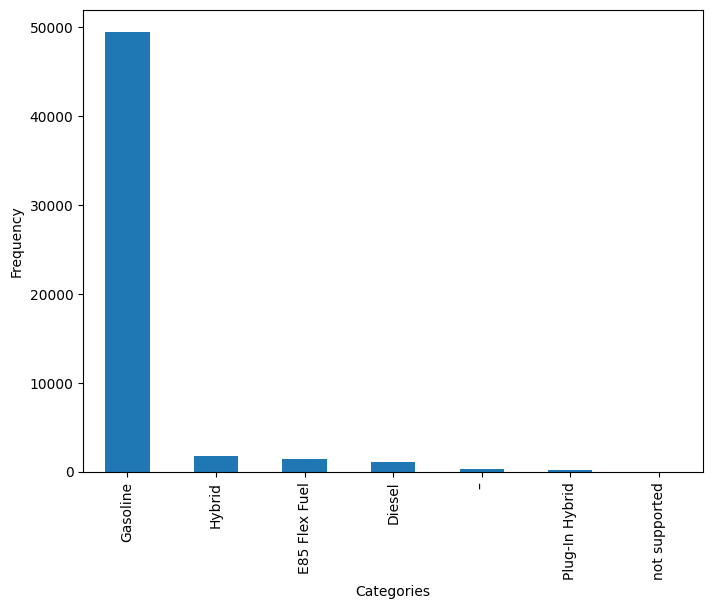

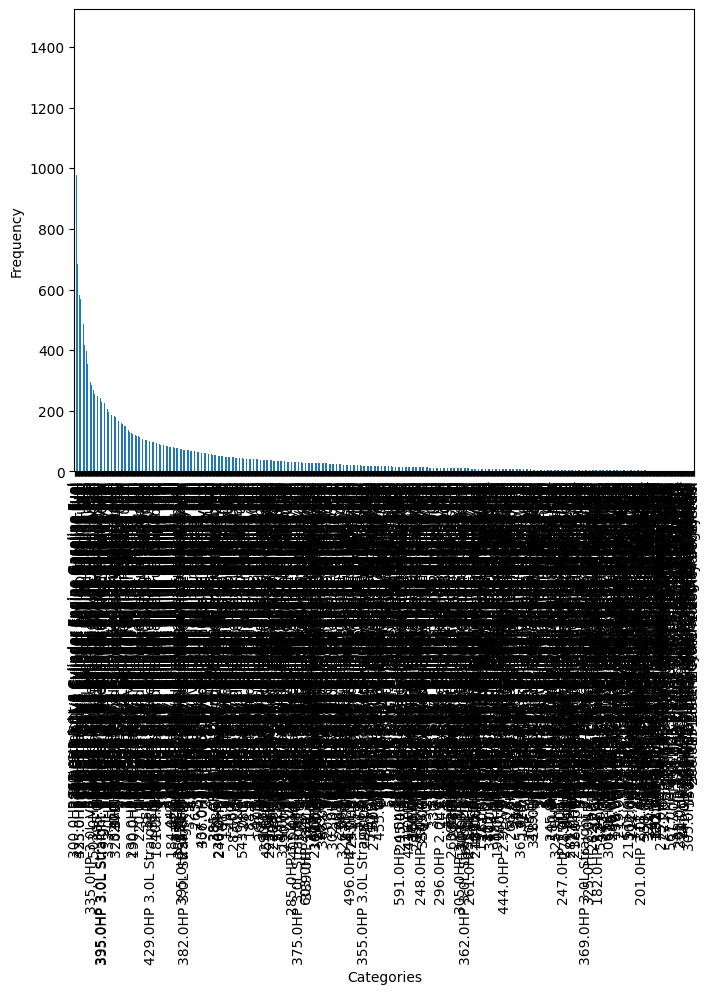

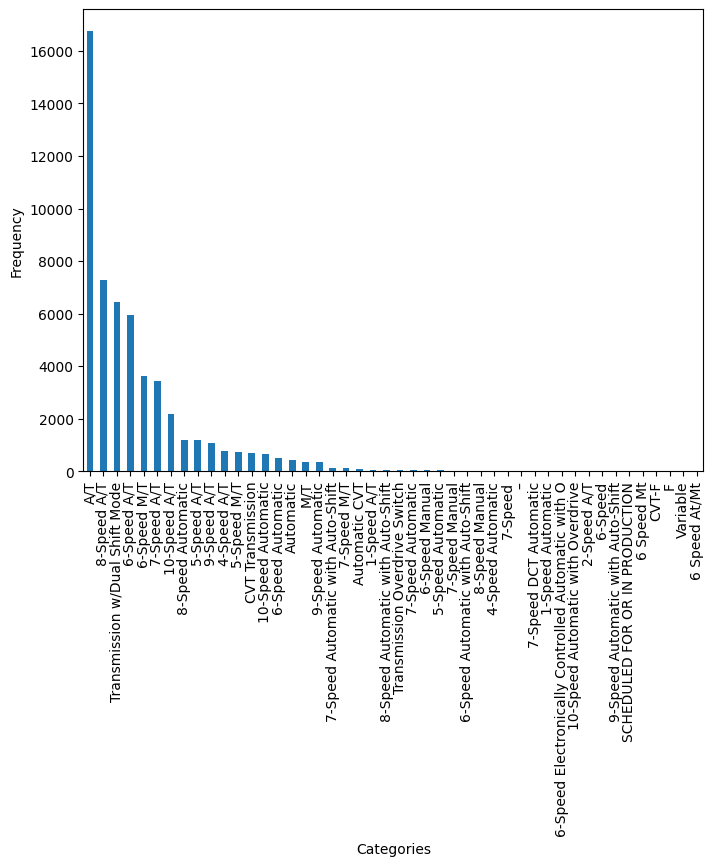

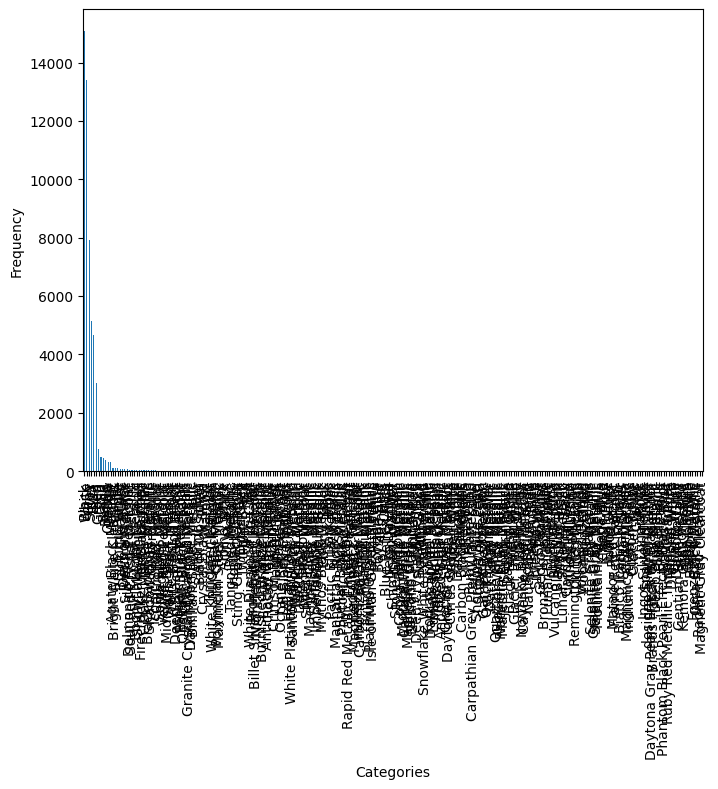

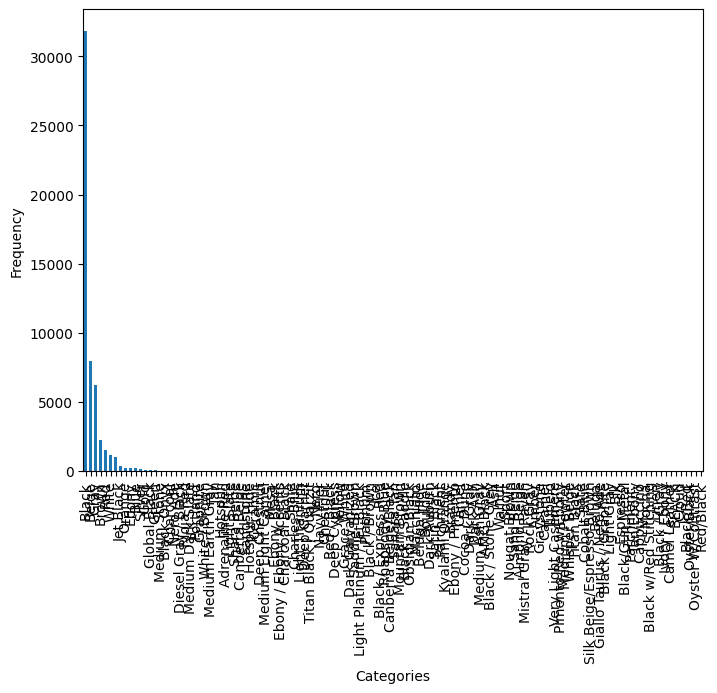

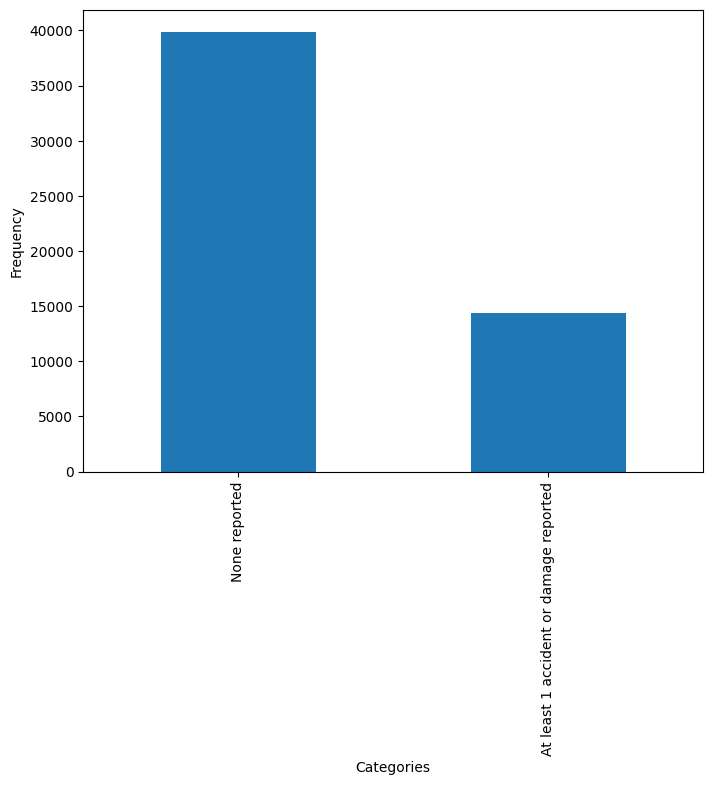

In [15]:
for col in cat_feat:
    plt.figure(figsize=(8, 6))
    train[col].value_counts().plot(kind='bar')
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.show()

In [15]:
## Changing to Milage Per Year
mil_yr = [] 
for mil, yr in zip(train.milage, train.age): 
    #yr = train.loc[train['milage'] == mil, ['age']] 
    mil_yr.append(mil/yr) 

In [16]:
## Changing to Milage Per Year
testmil_yr = [] 
for mil, yr in zip(test.milage, test.age): 
    #yr = train.loc[train['milage'] == mil, ['age']] 
    testmil_yr.append(mil/yr) 

In [18]:
mil_yr

[10621.285714285714,
 4444.444444444444,
 5718.1875,
 812.3333333333334,
 4625.0,
 5670.727272727273,
 9761.818181818182,
 8550.0,
 9760.222222222223,
 8459.444444444445,
 4988.571428571428,
 11591.0,
 10181.818181818182,
 6166.666666666667,
 7791.666666666667,
 10899.42857142857,
 5400.0,
 10372.25,
 11621.0,
 4756.333333333333,
 12366.0,
 6291.666666666667,
 10600.0,
 14875.0,
 5888.888888888889,
 5444.444444444444,
 1612.25,
 8877.076923076924,
 9600.0,
 9242.1,
 11100.0,
 2250.0,
 5900.0,
 9659.615384615385,
 11620.0,
 31000.0,
 4947.368421052632,
 5155.8,
 1383.7777777777778,
 6375.0,
 11625.0,
 7750.0,
 6487.0,
 10666.666666666666,
 5909.090909090909,
 16100.0,
 1848.2307692307693,
 9722.6,
 4388.888888888889,
 12583.181818181818,
 8538.461538461539,
 10833.25,
 7115.416666666667,
 10781.25,
 8095.238095238095,
 10443.0,
 14166.666666666666,
 5600.0,
 2374.375,
 5500.0,
 5714.285714285715,
 10285.714285714286,
 7333.333333333333,
 8311.153846153846,
 8166.666666666667,
 7022.3571

In [17]:
train['ml_yr'] = mil_yr
train = train.drop(['milage', 'clean_title'], axis=1)

In [18]:
test['ml_yr'] = testmil_yr
test = test.drop(['milage', 'clean_title'], axis=1)

In [21]:
train.head()

id    brand          model fuel_type  \
0   0     Ford   F-150 Lariat  Gasoline   
1   1      BMW          335 i  Gasoline   
2   2   Jaguar      XF Luxury  Gasoline   
3   3      BMW   X7 xDrive40i    Hybrid   
4   4  Pontiac  Firebird Base  Gasoline   

                                              engine  \
0      375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
1  300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
2       300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel   
3  335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
4      200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col       accident  price  age  \
0                    10-Speed A/T    Blue    Gray  None reported  11000    7   
1                     6-Speed M/T   Black   Black  None reported   8250   18   
2                     6-Speed A/T  Purple   Beige  None reported  15000   16   
3  Transmission w/Dual Shift Mode    Gray   Brown  None reported  63500    3   
4                             A/T   White   Black  None reported   7850   24   

          ml_yr  
0  10621.285714  
1   4444.444444  
2   5718.187500  
3    812.333333  
4   4625.000000

In [22]:
test.shape

(36183, 11)

In [19]:
train.fuel_type.value_counts()

fuel_type
Gasoline          49439
Hybrid             1766
E85 Flex Fuel      1479
Diesel             1109
–                   294
Plug-In Hybrid      182
not supported         4
Name: count, dtype: int64

In [24]:
train.dtypes

id                int64
brand            object
model            object
fuel_type        object
engine           object
transmission     object
ext_col          object
int_col          object
accident         object
price             int64
age               int64
ml_yr           float64
dtype: object

In [20]:
train[cat_feat] = train[cat_feat].astype(str)

In [21]:
test[cat_feat] = test[cat_feat].astype(str)

In [22]:
## Dropping less than 1000 quant of vechicles cause they are outliers
index = train[(train['fuel_type'] ==  'not supported') | (train['fuel_type'] ==  'Plug-In Hybrid') | (train['fuel_type'] == '-')].index
train.drop(index, inplace = True )

In [28]:
## Dropping less than 1000 quant of vechicles cause they are outliers
#index = test[(test['fuel_type'] ==  'not supported') | (test['fuel_type'] ==  'Plug-In Hybrid') | (test['fuel_type'] == '-')].index
#test.drop(index, inplace = True )

In [29]:
train.head()

id    brand          model fuel_type  \
0   0     Ford   F-150 Lariat  Gasoline   
1   1      BMW          335 i  Gasoline   
2   2   Jaguar      XF Luxury  Gasoline   
3   3      BMW   X7 xDrive40i    Hybrid   
4   4  Pontiac  Firebird Base  Gasoline   

                                              engine  \
0      375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
1  300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
2       300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel   
3  335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
4      200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col       accident  price  age  \
0                    10-Speed A/T    Blue    Gray  None reported  11000    7   
1                     6-Speed M/T   Black   Black  None reported   8250   18   
2                     6-Speed A/T  Purple   Beige  None reported  15000   16   
3  Transmission w/Dual Shift Mode    Gray   Brown  None reported  63500    3   
4                             A/T   White   Black  None reported   7850   24   

          ml_yr  
0  10621.285714  
1   4444.444444  
2   5718.187500  
3    812.333333  
4   4625.000000

In [23]:
train['accident'].unique()

array(['None reported', 'At least 1 accident or damage reported'],
      dtype=object)

In [24]:
## Converting Accident to Numeric
acc = {'None reported': 1, 'At least 1 accident or damage reported': 0}
train['accident'] = train['accident'].map(acc)

In [25]:
## Converting Accident to Numeric
acc = {'None reported': 1, 'At least 1 accident or damage reported': 0}
test['accident'] = test['accident'].map(acc)

In [26]:
train.head()

id    brand          model fuel_type  \
0   0     Ford   F-150 Lariat  Gasoline   
1   1      BMW          335 i  Gasoline   
2   2   Jaguar      XF Luxury  Gasoline   
3   3      BMW   X7 xDrive40i    Hybrid   
4   4  Pontiac  Firebird Base  Gasoline   

                                              engine  \
0      375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
1  300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
2       300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel   
3  335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
4      200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col  accident  price  age  \
0                    10-Speed A/T    Blue    Gray         1  11000    7   
1                     6-Speed M/T   Black   Black         1   8250   18   
2                     6-Speed A/T  Purple   Beige         1  15000   16   
3  Transmission w/Dual Shift Mode    Gray   Brown         1  63500    3   
4                             A/T   White   Black         1   7850   24   

          ml_yr  
0  10621.285714  
1   4444.444444  
2   5718.187500  
3    812.333333  
4   4625.000000

In [27]:
train.nunique()

id              54087
brand              53
model            1816
fuel_type           5
engine           1053
transmission       46
ext_col           260
int_col           124
accident            2
price            1481
age                34
ml_yr           14406
dtype: int64

In [28]:
train['int_col'].value_counts().head(6), train['int_col'].value_counts().head(6).sum()

(int_col
 Black    31735
 Beige     7943
 Gray      6241
 Brown     2230
 Red       1494
 White     1162
 Name: count, dtype: int64,
 50805)

In [29]:
train['ext_col'].value_counts().head(6), train['ext_col'].value_counts().head(6).sum()

(ext_col
 Black     15011
 White     13373
 Gray       7890
 Silver     5153
 Blue       4638
 Red        3012
 Name: count, dtype: int64,
 49077)

In [30]:
## Taking Top 6 Interior Colors
df = train.loc[(train['int_col'] == 'Black') | (train['int_col'] == 'Biege')| (train['int_col'] == 'Gray')|(train['int_col']=='Brown')|(train['int_col']== 'Red')|(train['int_col']== 'White')]

In [38]:
## Taking Top 6 Interior Colors
#test = test.loc[(test['int_col'] == 'Black') | (test['int_col'] == 'Biege')| (test['int_col'] == 'Gray')|(test['int_col']=='Brown')|(test['int_col']== 'Red')|(test['int_col']== 'White')]

In [39]:
df.head()

id    brand             model fuel_type  \
0   0     Ford      F-150 Lariat  Gasoline   
1   1      BMW             335 i  Gasoline   
3   3      BMW      X7 xDrive40i    Hybrid   
4   4  Pontiac     Firebird Base  Gasoline   
6   6     Audi  S5 3.0T Prestige  Gasoline   

                                              engine  \
0      375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
1  300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
3  335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
4      200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel   
6      333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col  accident  price  age  \
0                    10-Speed A/T    Blue    Gray         1  11000    7   
1                     6-Speed M/T   Black   Black         1   8250   18   
3  Transmission w/Dual Shift Mode    Gray   Brown         1  63500    3   
4                             A/T   White   Black         1   7850   24   
6                     7-Speed A/T    Gray   Black         1  26500   11   

          ml_yr  
0  10621.285714  
1   4444.444444  
3    812.333333  
4   4625.000000  
6   9761.818182

In [31]:
## Taking Top 6 Exterior Colors
df = df.loc[(train['ext_col'] == 'Black') | (train['ext_col'] == 'Silver')| (train['ext_col'] == 'Gray')|(train['ext_col']=='Blue')|(train['ext_col']== 'Red')|(train['ext_col']== 'White')]

In [41]:
## Taking Top 6 Exterior Colors
#test = test.loc[(test['ext_col'] == 'Black') | (test['ext_col'] == 'Silver')| (test['ext_col'] == 'Gray')|(test['ext_col']=='Blue')|(test['ext_col']== 'Red')|(test['ext_col']== 'White')]

In [42]:
df.shape

(39914, 12)

In [32]:
df['transmission'].value_counts()

transmission
A/T                                  12249
8-Speed A/T                           5870
Transmission w/Dual Shift Mode        5178
6-Speed A/T                           4486
6-Speed M/T                           3032
7-Speed A/T                           2746
10-Speed A/T                          1865
9-Speed A/T                            907
5-Speed A/T                            825
CVT Transmission                       517
5-Speed M/T                            508
4-Speed A/T                            476
M/T                                    254
8-Speed Automatic                      240
10-Speed Automatic                     140
6-Speed Automatic                      112
9-Speed Automatic                       98
7-Speed M/T                             85
Automatic                               70
7-Speed Automatic with Auto-Shift       57
1-Speed A/T                             44
Transmission Overdrive Switch           38
Automatic CVT                           2

In [33]:
## Dividing Automatic & Manual
auto = []
for tr in df['transmission']: 
    match = re.search('A', tr)
    if match: 
        auto.append(1) 
    else:
        auto.append(0) 

In [34]:
## Dividing Automatic & Manual
testauto = []
for tr in test['transmission']: 
    match = re.search('A', tr)
    if match: 
        testauto.append(1) 
    else:
        testauto.append(0) 

In [35]:
df['auto'] = auto

In [36]:
test['auto'] = testauto

In [37]:
df.head()

id    brand             model fuel_type  \
0   0     Ford      F-150 Lariat  Gasoline   
1   1      BMW             335 i  Gasoline   
3   3      BMW      X7 xDrive40i    Hybrid   
4   4  Pontiac     Firebird Base  Gasoline   
6   6     Audi  S5 3.0T Prestige  Gasoline   

                                              engine  \
0      375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
1  300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
3  335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
4      200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel   
6      333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col  accident  price  age  \
0                    10-Speed A/T    Blue    Gray         1  11000    7   
1                     6-Speed M/T   Black   Black         1   8250   18   
3  Transmission w/Dual Shift Mode    Gray   Brown         1  63500    3   
4                             A/T   White   Black         1   7850   24   
6                     7-Speed A/T    Gray   Black         1  26500   11   

          ml_yr  auto  
0  10621.285714     1  
1   4444.444444     0  
3    812.333333     0  
4   4625.000000     1  
6   9761.818182     1

In [38]:
## Getting Speed from Transmission
speed = []
for tr in df['transmission']: 
    match = re.search('\d+', tr)
    if match: 
        speed.append(int(match.group())) 
    else:
        speed.append(0) 

In [39]:
## Getting Speed from Transmission
testspeed = []
for tr in test['transmission']: 
    match = re.search('\d+', tr)
    if match: 
        testspeed.append(int(match.group())) 
    else:
        testspeed.append(0) 

In [40]:
df['speed'] = speed

In [41]:
test['speed'] = testspeed

In [42]:
df.head()

id    brand             model fuel_type  \
0   0     Ford      F-150 Lariat  Gasoline   
1   1      BMW             335 i  Gasoline   
3   3      BMW      X7 xDrive40i    Hybrid   
4   4  Pontiac     Firebird Base  Gasoline   
6   6     Audi  S5 3.0T Prestige  Gasoline   

                                              engine  \
0      375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
1  300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
3  335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
4      200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel   
6      333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col  accident  price  age  \
0                    10-Speed A/T    Blue    Gray         1  11000    7   
1                     6-Speed M/T   Black   Black         1   8250   18   
3  Transmission w/Dual Shift Mode    Gray   Brown         1  63500    3   
4                             A/T   White   Black         1   7850   24   
6                     7-Speed A/T    Gray   Black         1  26500   11   

          ml_yr  auto  speed  
0  10621.285714     1     10  
1   4444.444444     0      6  
3    812.333333     0      0  
4   4625.000000     1      0  
6   9761.818182     1      7

In [43]:
df = df.drop('transmission', axis=1)

In [44]:
test = test.drop('transmission', axis=1)

In [45]:
df = df.drop('model', axis=1)

In [46]:
test = test.drop('model', axis=1)

In [47]:
df.head()

id    brand fuel_type                                             engine  \
0   0     Ford  Gasoline      375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
1   1      BMW  Gasoline  300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
3   3      BMW    Hybrid  335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
4   4  Pontiac  Gasoline      200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel   
6   6     Audi  Gasoline      333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel   

  ext_col int_col  accident  price  age         ml_yr  auto  speed  
0    Blue    Gray         1  11000    7  10621.285714     1     10  
1   Black   Black         1   8250   18   4444.444444     0      6  
3    Gray   Brown         1  63500    3    812.333333     0      0  
4   White   Black         1   7850   24   4625.000000     1      0  
6    Gray   Black         1  26500   11   9761.818182     1      7

In [48]:
## Getting Horsepower from Engine Data
hp = []
for en in df['engine']: 
    match = re.search('\d+', en) 
    if match:
        hp.append(int(match.group())) 
    else: 
        hp.append(0)

In [49]:
## Getting Horsepower from Engine Data
testhp = []
for en in test['engine']: 
    match = re.search('\d+', en) 
    if match:
        testhp.append(int(match.group())) 
    else: 
        testhp.append(0)

In [50]:
df['hp'] = hp 
df.head()

id    brand fuel_type                                             engine  \
0   0     Ford  Gasoline      375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
1   1      BMW  Gasoline  300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
3   3      BMW    Hybrid  335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
4   4  Pontiac  Gasoline      200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel   
6   6     Audi  Gasoline      333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel   

  ext_col int_col  accident  price  age         ml_yr  auto  speed   hp  
0    Blue    Gray         1  11000    7  10621.285714     1     10  375  
1   Black   Black         1   8250   18   4444.444444     0      6  300  
3    Gray   Brown         1  63500    3    812.333333     0      0  335  
4   White   Black         1   7850   24   4625.000000     1      0  200  
6    Gray   Black         1  26500   11   9761.818182     1      7  333

In [51]:
test['hp'] = testhp 
test.head()

id          brand fuel_type  \
0  54273  Mercedes-Benz  Gasoline   
1  54274          Lexus  Gasoline   
2  54275  Mercedes-Benz  Gasoline   
3  54276           Land  Gasoline   
4  54277            BMW  Gasoline   

                                              engine ext_col int_col  \
0      302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   White   Beige   
1      275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel  Silver   Black   
2       241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel    Blue   White   
3       518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   White   White   
4  335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   White   Black   

   accident  age         ml_yr  auto  speed   hp  
0         1   11   6636.363636     1      0  302  
1         1   10  12803.200000     1      8  275  
2         1   10   5198.300000     1      7  241  
3         0    7   4214.285714     0      0  518  
4         0    5  18000.000000     1      8  335

In [52]:
## Getting Capacity from Engine Data
capacity = []
count=0
for en in df['engine']: 
    match = re.findall(r"(\d.\d)(L)", en)
    try: 
        capacity.append(float(match[0][0]))
    except:
        capacity.append(0)
        continue 
##    if not match:
##        capacity.append(0)
##    if match[0][0]:
##        capacity.append(float(match[0][0])) 

In [53]:
## Getting Capacity from Engine Data
testcapacity = []
count=0
for en in test['engine']: 
    match = re.findall(r"(\d.\d)(L)", en)
    try: 
        testcapacity.append(float(match[0][0]))
    except:
        testcapacity.append(0)
        continue 
##    if not match:
##        capacity.append(0)
##    if match[0][0]:
##        capacity.append(float(match[0][0])) 

In [54]:
len(capacity)

39914

In [55]:
df['capacity'] = capacity
df.head()

id    brand fuel_type                                             engine  \
0   0     Ford  Gasoline      375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
1   1      BMW  Gasoline  300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
3   3      BMW    Hybrid  335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
4   4  Pontiac  Gasoline      200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel   
6   6     Audi  Gasoline      333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel   

  ext_col int_col  accident  price  age         ml_yr  auto  speed   hp  \
0    Blue    Gray         1  11000    7  10621.285714     1     10  375   
1   Black   Black         1   8250   18   4444.444444     0      6  300   
3    Gray   Brown         1  63500    3    812.333333     0      0  335   
4   White   Black         1   7850   24   4625.000000     1      0  200   
6    Gray   Black         1  26500   11   9761.818182     1      7  333   

   capacity  
0       3.5  
1       3.0  
3       3.0  
4       3.8  
6       3.0

In [56]:
test['capacity'] = testcapacity
test.head()

id          brand fuel_type  \
0  54273  Mercedes-Benz  Gasoline   
1  54274          Lexus  Gasoline   
2  54275  Mercedes-Benz  Gasoline   
3  54276           Land  Gasoline   
4  54277            BMW  Gasoline   

                                              engine ext_col int_col  \
0      302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   White   Beige   
1      275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel  Silver   Black   
2       241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel    Blue   White   
3       518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   White   White   
4  335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   White   Black   

   accident  age         ml_yr  auto  speed   hp  capacity  
0         1   11   6636.363636     1      0  302       3.5  
1         1   10  12803.200000     1      8  275       3.5  
2         1   10   5198.300000     1      7  241       2.0  
3         0    7   4214.285714     0      0  518       5.0  
4         0    5  18000.000000     1      8  335       3.0

In [57]:
## Getting Valves from Engine Data
valves = []
count=0
for en in df['engine']: 
    match = re.findall(r"\d{1}", en)
    print(match)
    try: 
        valves.append(int(match[-1]))
    except:
        valves.append(0)
        continue 

['3', '7', '5', '0', '3', '5', '6']
['3', '0', '0', '0', '3', '0', '6']
['3', '3', '5', '0', '3', '0', '6']
['2', '0', '0', '0', '3', '8', '6']
['3', '3', '3', '0', '3', '0', '6']
['1', '9', '3', '0', '2', '5', '4']
['2', '0', '0', '0', '2', '0', '4']
['4', '0', '5', '0', '3', '0', '6']
['3', '0', '0', '0', '3', '6', '6']
['2', '4', '8', '0', '3', '5', '6']
['1', '8', '2', '0', '2', '4', '4']
['2', '7', '1', '0']
['3', '8', '6', '0', '4', '6', '8']
['5', '2', '3', '0', '4', '4', '8']
['2', '4', '0', '0', '2', '0', '4']
['3', '1', '0', '0', '2', '3', '4']
['3', '0', '3', '0', '3', '6', '6']
['6', '5', '0', '0', '6', '2', '8']
['3', '1', '0', '0', '3', '0', '6']
['1', '5', '0', '0', '1', '4', '4']
['4', '4', '0', '0', '6', '7', '8']
['1', '6', '9', '0', '2', '5', '4']
['4', '2', '0', '0', '6', '2', '8']
['2', '1', '1', '0', '2', '0', '4']
['4', '2', '0', '0', '6', '2', '8']
['2', '8', '0', '0', '3', '9', '8']
['3', '9', '5', '0', '5', '7', '8']
['3', '5', '5', '0', '5', '3', '8']
['5', '

In [58]:
## Getting Valves from Engine Data
testvalves = []
count=0
for en in test['engine']: 
    match = re.findall(r"\d{1}", en)
    print(match)
    try: 
        testvalves.append(int(match[-1]))
    except:
        testvalves.append(0)
        continue 

['3', '0', '2', '0', '3', '5', '6']
['2', '7', '5', '0', '3', '5', '6']
['2', '4', '1', '0', '2', '0', '4']
['5', '1', '8', '0', '5', '0', '8']
['3', '3', '5', '0', '3', '0', '6']
['6', '5', '0', '0', '6', '2', '8']
['3', '8', '0', '0', '3', '0', '6']
['2', '4', '7', '0', '2', '0', '4']
['2', '8', '3', '0', '3', '6', '6']
['3', '4', '9', '0', '3', '0', '6']
['4', '4', '0', '0', '6', '7', '8']
['1', '9', '9', '0', '2', '4', '4']
['5', '5', '5', '0', '4', '4', '8']
['3', '6', '6', '2', '4']
['2', '5', '0', '0', '2', '0', '4']
['5', '0', '3', '0', '3', '0', '6']
['3', '4', '6', '2', '4']
['4', '2', '9', '0', '4', '6', '8']
['3', '1', '8', '0', '3', '6', '6']
['3', '9', '5', '0', '3', '0', '6']
['4', '2', '0', '0', '6', '2', '8']
['3', '2', '5', '0', '6', '0', '8']
['2', '8', '5', '0', '3', '6', '6']
['2', '7', '5', '0', '2', '3', '4']
['2', '4', '0', '0', '2', '0', '4']
['1', '8', '4', '0', '2', '5', '4']
['3', '0', '0', '0', '3', '7', '6']
['3', '5', '6', '2', '4']
['4', '2', '0', '0', '

In [59]:
valves

[6,
 6,
 6,
 6,
 6,
 4,
 4,
 6,
 6,
 6,
 4,
 0,
 8,
 8,
 4,
 4,
 6,
 8,
 6,
 4,
 8,
 4,
 8,
 4,
 8,
 8,
 8,
 8,
 8,
 4,
 6,
 6,
 8,
 6,
 6,
 4,
 8,
 6,
 6,
 4,
 6,
 6,
 6,
 6,
 4,
 6,
 4,
 8,
 4,
 4,
 6,
 6,
 6,
 6,
 6,
 8,
 0,
 4,
 8,
 6,
 8,
 4,
 4,
 6,
 6,
 4,
 4,
 6,
 8,
 6,
 6,
 6,
 8,
 4,
 4,
 4,
 8,
 6,
 6,
 6,
 4,
 8,
 4,
 6,
 8,
 6,
 6,
 6,
 6,
 8,
 6,
 4,
 6,
 4,
 4,
 8,
 8,
 4,
 8,
 6,
 6,
 4,
 6,
 6,
 6,
 8,
 4,
 6,
 4,
 6,
 4,
 4,
 6,
 4,
 6,
 4,
 2,
 8,
 6,
 8,
 6,
 5,
 6,
 8,
 4,
 4,
 8,
 6,
 6,
 4,
 6,
 8,
 6,
 6,
 8,
 4,
 6,
 6,
 6,
 8,
 6,
 8,
 4,
 6,
 8,
 8,
 4,
 8,
 8,
 6,
 6,
 8,
 2,
 6,
 8,
 6,
 6,
 6,
 6,
 6,
 4,
 8,
 8,
 6,
 6,
 4,
 4,
 8,
 4,
 4,
 6,
 8,
 8,
 8,
 8,
 8,
 6,
 6,
 0,
 8,
 6,
 6,
 6,
 6,
 6,
 6,
 8,
 8,
 8,
 8,
 4,
 4,
 4,
 6,
 6,
 4,
 8,
 6,
 6,
 4,
 8,
 6,
 4,
 8,
 4,
 6,
 4,
 8,
 6,
 4,
 8,
 8,
 4,
 8,
 4,
 4,
 4,
 8,
 6,
 8,
 6,
 6,
 6,
 8,
 8,
 8,
 6,
 8,
 0,
 8,
 8,
 8,
 6,
 6,
 6,
 6,
 4,
 6,
 6,
 4,
 6,
 6,
 4,
 4,
 6,
 8,
 6,
 4,
 6,
 8,


In [60]:
df['valves'] = valves
df.head()

id    brand fuel_type                                             engine  \
0   0     Ford  Gasoline      375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
1   1      BMW  Gasoline  300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
3   3      BMW    Hybrid  335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
4   4  Pontiac  Gasoline      200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel   
6   6     Audi  Gasoline      333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel   

  ext_col int_col  accident  price  age         ml_yr  auto  speed   hp  \
0    Blue    Gray         1  11000    7  10621.285714     1     10  375   
1   Black   Black         1   8250   18   4444.444444     0      6  300   
3    Gray   Brown         1  63500    3    812.333333     0      0  335   
4   White   Black         1   7850   24   4625.000000     1      0  200   
6    Gray   Black         1  26500   11   9761.818182     1      7  333   

   capacity  valves  
0       3.5       6  
1       3.0       6  
3       3.0       6  
4       3.8       6  
6       3.0       6

In [61]:
test['valves'] = testvalves
test.head()

id          brand fuel_type  \
0  54273  Mercedes-Benz  Gasoline   
1  54274          Lexus  Gasoline   
2  54275  Mercedes-Benz  Gasoline   
3  54276           Land  Gasoline   
4  54277            BMW  Gasoline   

                                              engine ext_col int_col  \
0      302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   White   Beige   
1      275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel  Silver   Black   
2       241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel    Blue   White   
3       518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   White   White   
4  335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   White   Black   

   accident  age         ml_yr  auto  speed   hp  capacity  valves  
0         1   11   6636.363636     1      0  302       3.5       6  
1         1   10  12803.200000     1      8  275       3.5       6  
2         1   10   5198.300000     1      7  241       2.0       4  
3         0    7   4214.285714     0      0  518       5.0       8  
4         0    5  18000.000000     1      8  335       3.0       6

In [62]:
df.drop('engine',axis=1,inplace=True)

In [63]:
test.drop('engine',axis=1,inplace=True)

In [64]:
df.head()

id    brand fuel_type ext_col int_col  accident  price  age         ml_yr  \
0   0     Ford  Gasoline    Blue    Gray         1  11000    7  10621.285714   
1   1      BMW  Gasoline   Black   Black         1   8250   18   4444.444444   
3   3      BMW    Hybrid    Gray   Brown         1  63500    3    812.333333   
4   4  Pontiac  Gasoline   White   Black         1   7850   24   4625.000000   
6   6     Audi  Gasoline    Gray   Black         1  26500   11   9761.818182   

   auto  speed   hp  capacity  valves  
0     1     10  375       3.5       6  
1     0      6  300       3.0       6  
3     0      0  335       3.0       6  
4     1      0  200       3.8       6  
6     1      7  333       3.0       6

In [65]:
cat_feat = ['brand', 'fuel_type','ext_col', 'int_col']

In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
label_encoder = LabelEncoder()
for column in cat_feat:
    df[column] = label_encoder.fit_transform(df[column])

In [68]:
label_encoder = LabelEncoder()
for column in cat_feat:
    test[column] = label_encoder.fit_transform(test[column])

In [69]:
df.head()

id  brand  fuel_type  ext_col  int_col  accident  price  age         ml_yr  \
0   0     14          2        1        2         1  11000    7  10621.285714   
1   1      4          2        0        0         1   8250   18   4444.444444   
3   3      4          3        2        1         1  63500    3    812.333333   
4   4     39          2        5        0         1   7850   24   4625.000000   
6   6      3          2        2        0         1  26500   11   9761.818182   

   auto  speed   hp  capacity  valves  
0     1     10  375       3.5       6  
1     0      6  300       3.0       6  
3     0      0  335       3.0       6  
4     1      0  200       3.8       6  
6     1      7  333       3.0       6

In [70]:
df.drop('id', inplace=True, axis=1)

In [71]:
price = df['price'] 
df.drop('price', axis=1,inplace=True) 
df['price'] = price

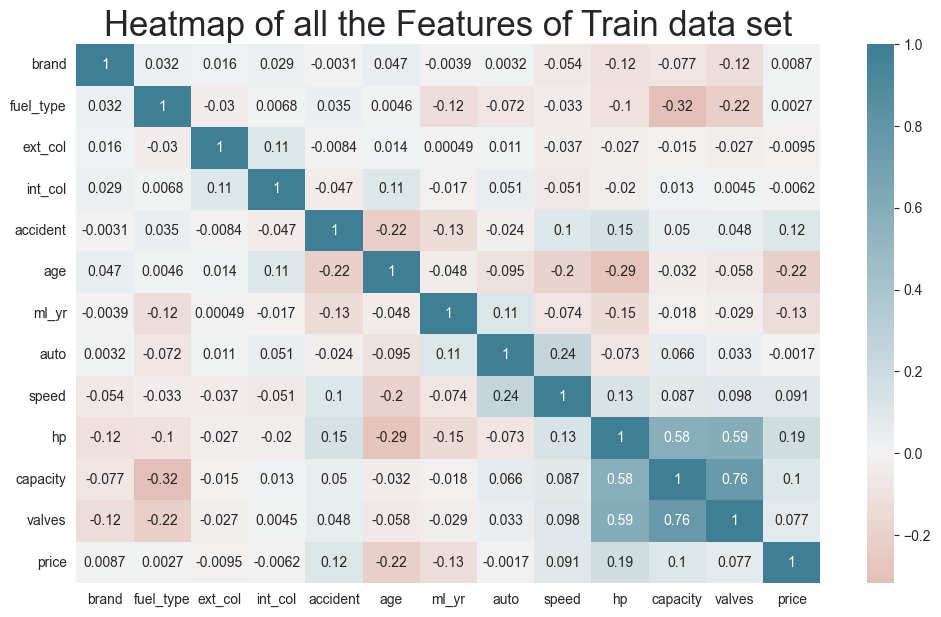

In [72]:
sns.set_style('whitegrid')
plt.subplots(figsize = (12,7))

sns.heatmap(df.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, center = 0 );
plt.title("Heatmap of all the Features of Train data set", fontsize = 25);

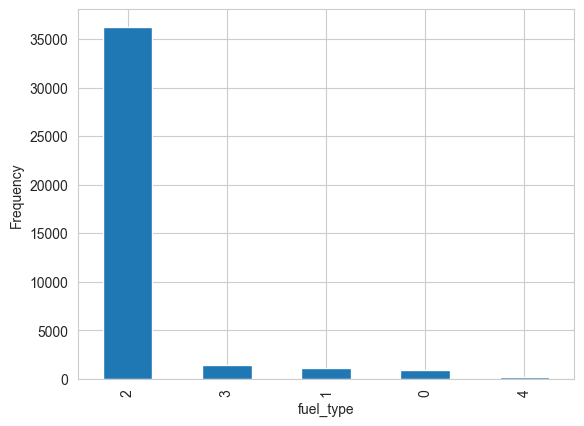

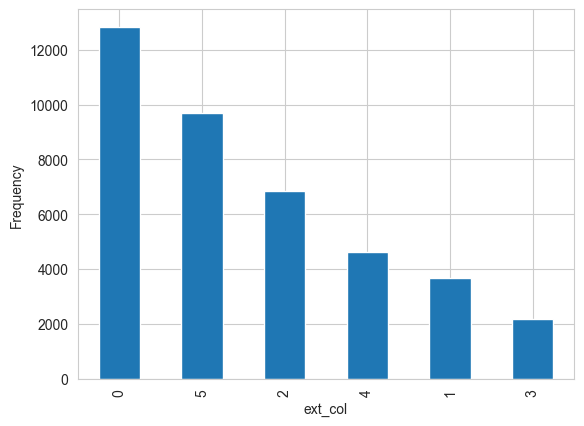

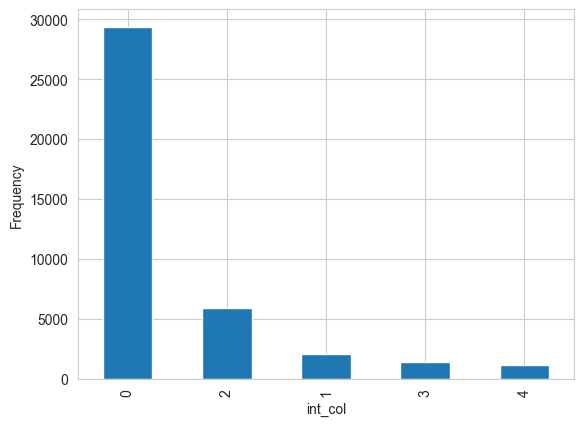

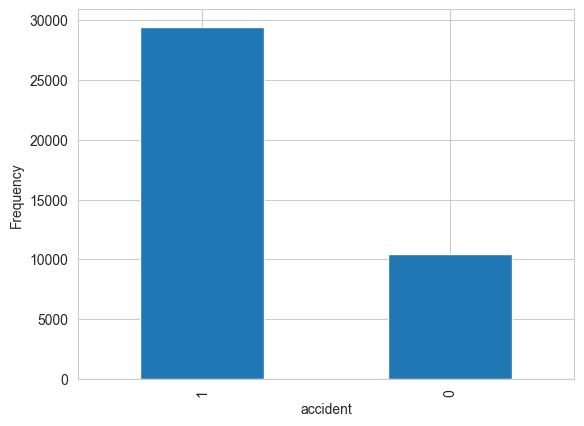

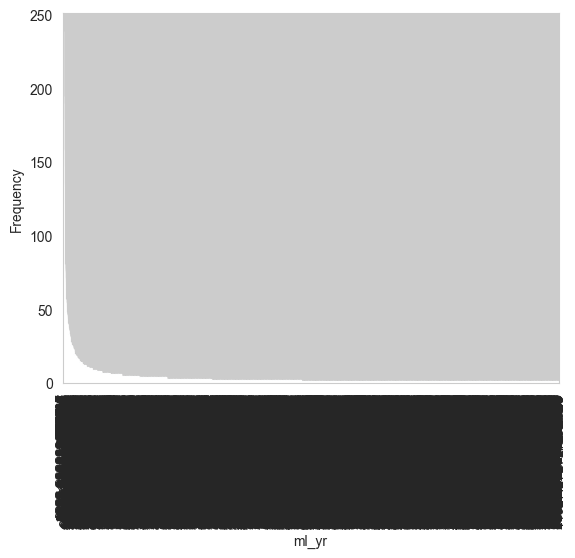

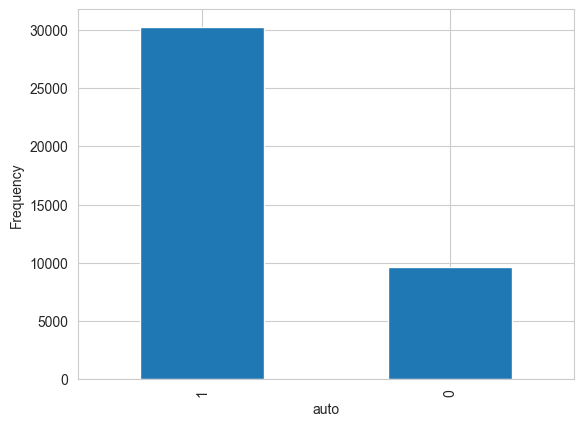

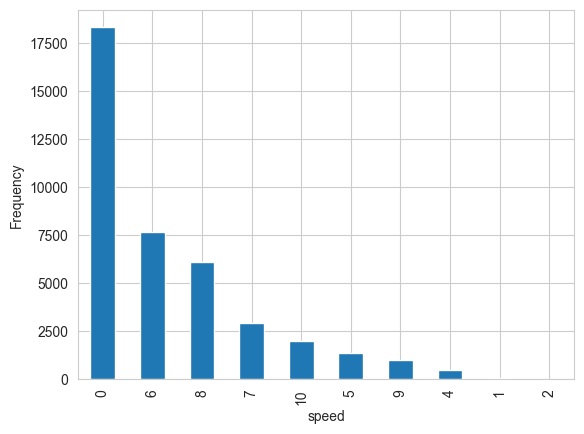

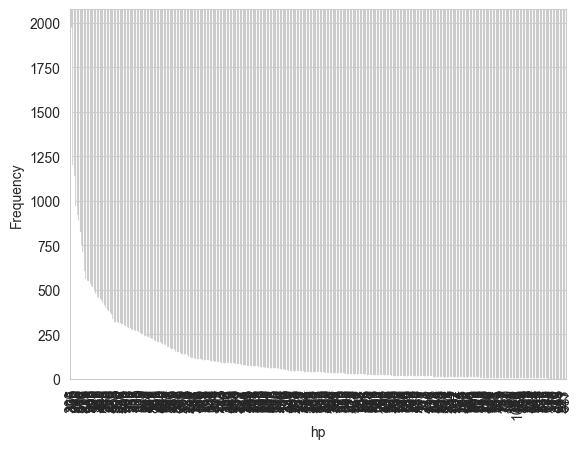

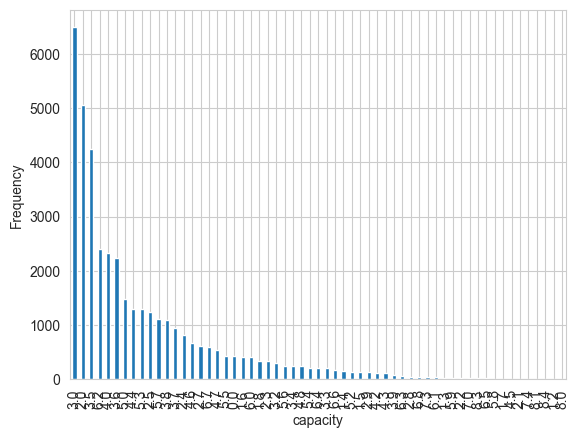

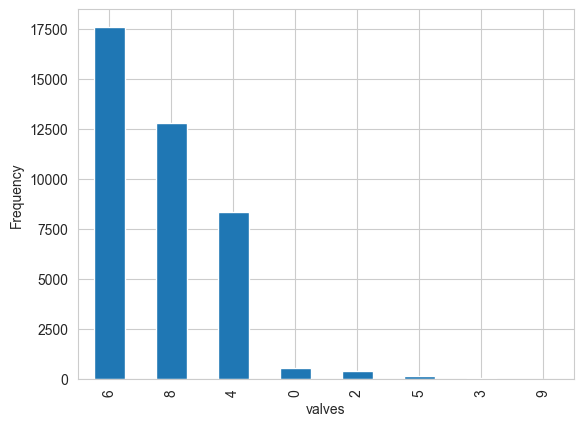

In [84]:
## DATA VISUALISATION 
for cat in ['fuel_type', 'ext_col', 'int_col', 'accident', 'ml_yr', 'auto', 'speed', 'hp', 'capacity', 'valves']: 
    df[cat].value_counts().plot(kind='bar')
    plt.xlabel(cat)
    plt.ylabel('Frequency')
    plt.show()

<Axes: xlabel='fuel_type', ylabel='price'>

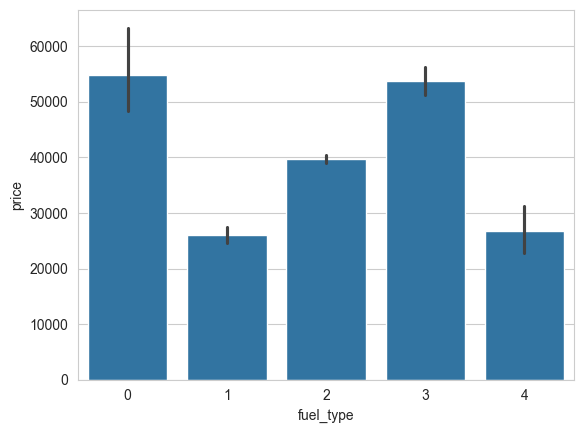

In [85]:
sns.barplot( x='fuel_type', y= 'price', data= df)

<Axes: xlabel='brand', ylabel='price'>

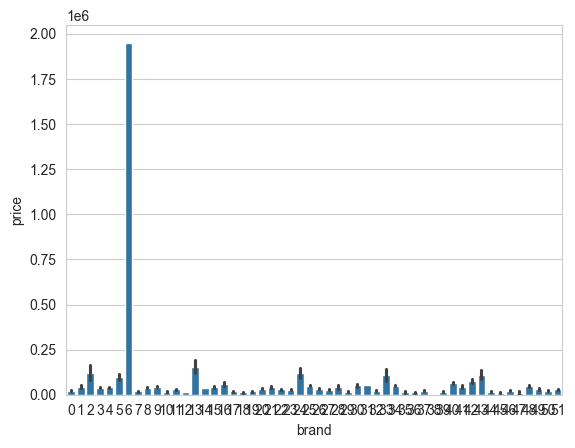

In [86]:
sns.barplot( x='brand', y= 'price', data= df)

<Axes: xlabel='speed', ylabel='price'>

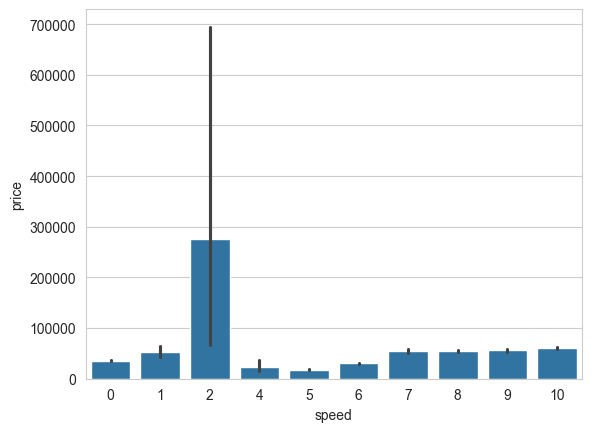

In [87]:
sns.barplot( x='speed', y= 'price', data=df)

<Axes: xlabel='auto', ylabel='price'>

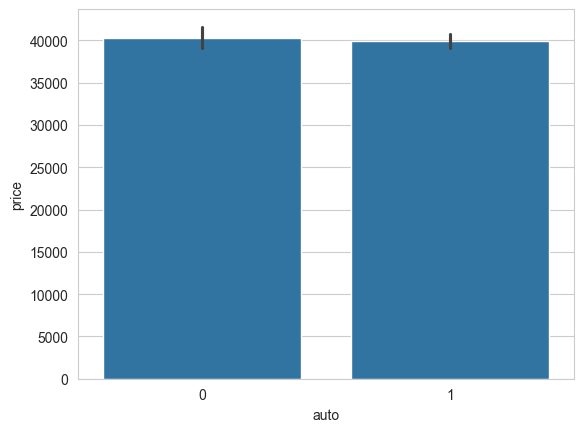

In [88]:
sns.barplot( x='auto', y= 'price', data=df)

<Axes: xlabel='age', ylabel='price'>

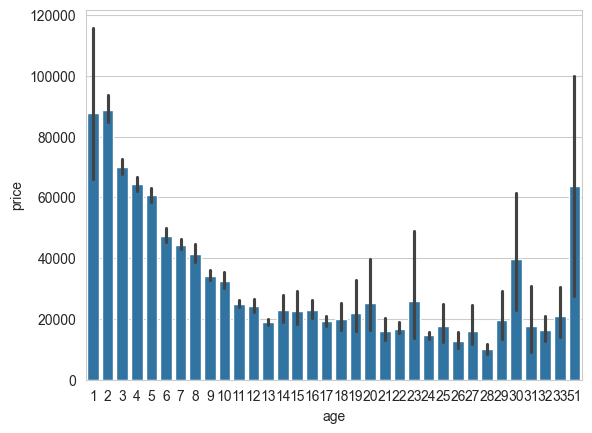

In [89]:
sns.barplot( x='age', y= 'price', data=df)

<Axes: xlabel='capacity', ylabel='price'>

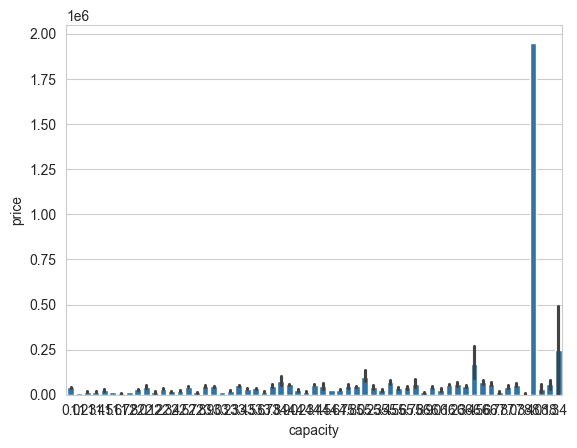

In [90]:
sns.barplot( x='capacity', y= 'price', data=df)

<Axes: xlabel='ml_yr', ylabel='price'>

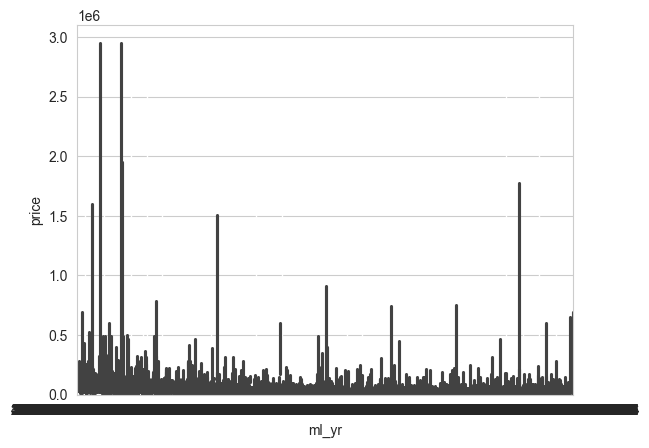

In [91]:
sns.barplot( x='ml_yr', y= 'price', data=df)

In [92]:
df

brand  fuel_type  ext_col  int_col  accident  age         ml_yr  auto  \
0         14          2        1        2         1    7  10621.285714     1   
1          4          2        0        0         1   18   4444.444444     0   
3          4          3        2        1         1    3    812.333333     0   
4         39          2        5        0         1   24   4625.000000     1   
6          3          2        2        0         1   11   9761.818182     1   
...      ...        ...      ...      ...       ...  ...           ...   ...   
54267     25          3        4        0         1    5  13800.000000     0   
54268      4          2        5        1         1    8   3625.000000     1   
54269      3          1        0        0         0   10   9463.400000     1   
54270     40          2        5        0         0   12   3415.750000     0   
54272      3          3        0        0         1    4   8750.000000     1   

       speed   hp  capacity  valves  price  
0         10  375       3.5       6  11000  
1          6  300       3.0       6   8250  
3          0  335       3.0       6  63500  
4          0  200       3.8       6   7850  
6          7  333       3.0       6  26500  
...      ...  ...       ...     ...    ...  
54267      0  395       3.0       6  32500  
54268      8  445       4.4       8  29000  
54269      6  220       2.0       4   6500  
54270      0  420       3.6       6  18950  
54272      8  261       2.0       4  37499  

[39914 rows x 13 columns]

In [73]:
## MODEL MAKING
x = df[['brand' ,'fuel_type', 'ext_col', 'int_col', 'accident', 'age', 'ml_yr', 'auto', 'speed', 'hp', 'capacity', 'valves']]
y = df['price']

In [74]:
x

brand  fuel_type  ext_col  int_col  accident  age         ml_yr  auto  \
0         14          2        1        2         1    7  10621.285714     1   
1          4          2        0        0         1   18   4444.444444     0   
3          4          3        2        1         1    3    812.333333     0   
4         39          2        5        0         1   24   4625.000000     1   
6          3          2        2        0         1   11   9761.818182     1   
...      ...        ...      ...      ...       ...  ...           ...   ...   
54267     25          3        4        0         1    5  13800.000000     0   
54268      4          2        5        1         1    8   3625.000000     1   
54269      3          1        0        0         0   10   9463.400000     1   
54270     40          2        5        0         0   12   3415.750000     0   
54272      3          3        0        0         1    4   8750.000000     1   

       speed   hp  capacity  valves  
0         10  375       3.5       6  
1          6  300       3.0       6  
3          0  335       3.0       6  
4          0  200       3.8       6  
6          7  333       3.0       6  
...      ...  ...       ...     ...  
54267      0  395       3.0       6  
54268      8  445       4.4       8  
54269      6  220       2.0       4  
54270      0  420       3.6       6  
54272      8  261       2.0       4  

[39914 rows x 12 columns]

In [75]:
## MODEL MAKING
#x = df[['fuel_type', 'accident', 'age','capacity, 'auto']]
x = df[['accident','age','capacity']]
y = df['price'].divide(1000)

In [76]:
test.head()

id  brand  fuel_type  ext_col  int_col  accident  age         ml_yr  \
0  54273     34          2      220        8         1   11   6636.363636   
1  54274     26          2      187       10         1   10  12803.200000   
2  54275     34          2       26      107         1   10   5198.300000   
3  54276     25          2      220      107         0    7   4214.285714   
4  54277      4          2      220       10         0    5  18000.000000   

   auto  speed   hp  capacity  valves  
0     1      0  302       3.5       6  
1     1      8  275       3.5       6  
2     1      7  241       2.0       4  
3     0      0  518       5.0       8  
4     1      8  335       3.0       6

In [77]:
test.shape

(36183, 13)

In [78]:
index = pd.DataFrame(test.id, columns = ['id']) 

In [79]:
## MODEL MAKING
test = test[['accident','age','capacity']]

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=45)

In [82]:
# Linear models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# Support Vector Regression
from sklearn.svm import SVR

# Tree-based models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Gradient boosting models
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor

In [83]:
# Error & Accuracy Libraries 
from sklearn.metrics import mean_absolute_error,mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV

In [84]:
# Mass Training & Eval with Various Models But With Default Parameters
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Elastic Net": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Support Vector Regression": SVR(kernel='rbf'),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "LightGBM": lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "CatBoost": CatBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42, verbose=0)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    mae = mean_absolute_error(ytest, ypred)
    mse = mean_squared_error(ytest, ypred)
    rmse = root_mean_squared_error(ytest, ypred)
    r2 = r2_score(ytest, ypred)
    print(f'{name} MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R^2: {r2}')

Linear Regression MAE: 21.431252008030768, MSE: 5234.912922313497, RMSE: 72.35269809974952, R^2: 0.059327874644359624
Ridge Regression MAE: 21.43122076662224, MSE: 5234.914439313938, RMSE: 72.35270858312036, R^2: 0.05932760205147225
Lasso Regression MAE: 21.42206040096769, MSE: 5235.544779091758, RMSE: 72.35706447259838, R^2: 0.05921433501775131
Elastic Net MAE: 21.415273371650084, MSE: 5238.2613463394255, RMSE: 72.37583399408553, R^2: 0.05872618953673625
Support Vector Regression MAE: 17.716998948482665, MSE: 5285.650146742523, RMSE: 72.70247689551246, R^2: 0.050210799834029096
Decision Tree MAE: 19.658533076490272, MSE: 5302.215196951347, RMSE: 72.81631133854108, R^2: 0.047234192349282056
Random Forest MAE: 19.60950766173645, MSE: 5268.405464752661, RMSE: 72.5837823811398, R^2: 0.05330953173257558
Gradient Boosting MAE: 19.129795814323245, MSE: 5082.1498183135145, RMSE: 71.28919846872677, R^2: 0.08677818677908034
XGBoost MAE: 19.167049416033066, MSE: 5128.577911210435, RMSE: 71.61409

In [85]:
((y.sum())/54087)*0.05

1.477293093534491

In [86]:
model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(xtrain, ytrain)
submission = model.predict(test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 31931, number of used features: 3
[LightGBM] [Info] Start training from score 39.892506


In [87]:
sub_file = pd.DataFrame(submission, columns = ['price'])
sub_file = pd.concat([index, sub_file], axis =1) 
sub_file['price'] = sub_file['price'].multiply(1000)
sub_file.head(10)

id         price
0  54273  23196.181495
1  54274  28000.829630
2  54275  22403.035770
3  54276  43597.198647
4  54277  49832.571197
5  54278  47648.200200
6  54279  46296.276524
7  54280  33464.583832
8  54281  20034.028208
9  54282  77345.506899

In [120]:
sub_file.to_csv('submission.csv', index=False)

In [109]:
sub_file.shape

(36183, 2)